In [2]:
import numpy as np
import pandas as pd
import GMCM_class as G

In [3]:
data = pd.read_csv("crab_age.csv")

data

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


## GMCM Learning Curve

In [30]:
data_size_vary = {}
runtime_collection = {}
data = pd.read_csv("crab_age.csv")
import GMCM_class as G
G = G.GaussianCopulaSynthesizer(data)
G._identify_columns()
G.convert_datetime_to_numerical()
G.handle_missing_values()
G.assign_intervals()
G.preprocess_data()
G.fit_distributions()
G.compute_gmm_cdf()
G.standard_gaussian_all()
for i in range(5):
    G.generate_synthetic_data(((i+1)*2)*10000)
    synthetic = G.post_process()
    data_size_vary[str(((i+1)*2)*10000) + "rows data"] = synthetic
    runtime_collection[str(((i+1)*2)*10000) + "rows data runtime"] = G.get_execution_times_df()

100%|██████████| 100000/100000 [2:41:40<00:00, 10.31it/s] 


In [28]:
# data_sdv = data_size_vary['20000rows data']

<Axes: >

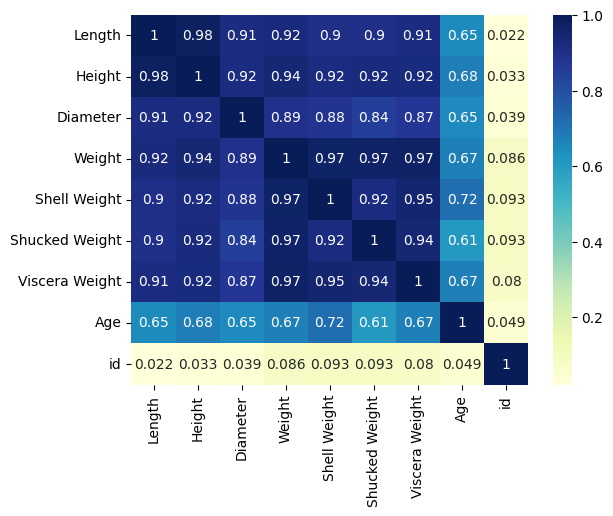

In [29]:
# import seaborn as sns
# numeric_cols = data_sdv.select_dtypes(include=np.number).columns.tolist()
# corr_matrix_sdv = data_sdv[numeric_cols].corr()
# sns.heatmap(corr_matrix_sdv, annot=True, cmap='YlGnBu', cbar=True)

In [23]:
data = pd.read_csv('crab_age.csv')
data

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Function to calculate regression metrics
def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Avoid division by zero for MAPE
    non_zero_mask = y_true != 0
    mape = (np.abs(y_true - y_pred) / y_true)[non_zero_mask].mean() * 100

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    }

# Loading real data
real_data = pd.read_csv("crab_age.csv")
real_data.drop(["id"], axis=1, inplace=True)

# Extract target column and input columns from real data
target_column = 'Age'
input_columns = real_data.drop(columns=[target_column]).columns.tolist()

input_columns = list(real_data.select_dtypes(include=np.number).columns.tolist()) + list(real_data.select_dtypes(exclude=np.number).columns.tolist())
input_columns = set(input_columns) - set(["Sex"])
input_columns = list(input_columns)

# Function for learning curve evaluation
def learning_curve_evaluation(data_sizes, real_data, target_column, input_columns):
    performance_metrics = []

    for size, synthetic_data in data_sizes.items():
        # Preprocessing
        X_synthetic = synthetic_data[input_columns]
        y_synthetic = synthetic_data[target_column]
        X_real = real_data[input_columns]
        y_real = real_data[target_column]
        scaler = MinMaxScaler()
        X_synthetic[X_synthetic.select_dtypes(include=np.number).columns.tolist()] = scaler.fit_transform(X_synthetic[X_synthetic.select_dtypes(include=np.number).columns.tolist()])
        X_real[X_real.select_dtypes(include=np.number).columns.tolist()] = scaler.fit_transform(X_real[X_real.select_dtypes(include=np.number).columns.tolist()])

        encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

        encoder.fit(X_synthetic[X_synthetic.select_dtypes(exclude=np.number).columns.tolist()])
        encoded_cols = encoder.get_feature_names_out()
        encoded_cols

        X_synthetic[encoded_cols] = encoder.transform(X_synthetic[X_synthetic.select_dtypes(exclude=np.number).columns.tolist()])
        X_real[encoded_cols] = encoder.transform(X_real[X_real.select_dtypes(exclude=np.number).columns.tolist()])

        # Train-test split for synthetic data
        X_train, X_val, y_train, y_val = train_test_split(X_synthetic, y_synthetic, test_size=0.1, random_state=42)

        # Model training and hyperparameter tuning
        rf = RandomForestRegressor(random_state=0)
        param_grid = {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [1, 3, 5, 7],
            'criterion': ['squared_error', 'poisson']
        }
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Best model
        best_rf = grid_search.best_estimator_

        # Predictions and metrics
        y_pred = best_rf.predict(X_real)
        metrics = calculate_regression_metrics(y_real, y_pred)
        performance_metrics.append({'Data Size': size, **metrics})

    return pd.DataFrame(performance_metrics)

# Running the evaluation
learning_curve_results = learning_curve_evaluation(data_size_vary, real_data, target_column, input_columns)
learning_curve_results

,Data Size,MAE,MSE,RMSE,R-squared,MAPE
0,20000rows data,0.971685,0.958411,0.978985,0.904936,11.006251
1,40000rows data,0.960838,0.940510,0.969799,0.906711,10.871278
2,60000rows data,0.962861,0.944229,0.971714,0.906342,10.902074
3,80000rows data,0.961226,0.943197,0.971183,0.906445,10.866947
4,100000rows data,0.915617,0.890765,0.943804,0.911645,10.473751


### GMCM Learning Curve Result

In [32]:
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px
import matplotlib.pyplot as plt

fig = go.Figure()
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["MAE"], mode='lines+markers', name='MAE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["MSE"], mode='lines+markers', name='MSE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["RMSE"], mode='lines+markers', name='RMSE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["R-squared"], mode='lines+markers', name='R-squared'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["MAPE"], mode='lines+markers', name='MAPE'))


# Update plot layout
fig.update_layout(title='Performance Metrics across Different Data Sizes',
                  xaxis_title='Data Size',
                  yaxis_title='Metric Value',
                  legend_title='Metrics')

# Show plot
fig.show()

In [34]:
runtime_collection

{'20000rows data runtime':                 Process  Time (seconds)
 0     _identify_columns        0.017003
 1  handle_missing_value        0.002001
 2      assign_intervals        0.021004
 3       preprocess_data       55.626577
 4      fit_distribution       48.814416
 5           compute_cdf      508.481784
 6     standard_gaussian       43.242771
 7     generate_syn_data     1949.000210
 8          post_process       46.037819,
 '40000rows data runtime':                 Process  Time (seconds)
 0     _identify_columns        0.017003
 1  handle_missing_value        0.002001
 2      assign_intervals        0.021004
 3       preprocess_data       55.626577
 4      fit_distribution       48.814416
 5           compute_cdf      508.481784
 6     standard_gaussian       43.242771
 7     generate_syn_data     3892.060655
 8          post_process       92.162825,
 '60000rows data runtime':                 Process  Time (seconds)
 0     _identify_columns        0.017003
 1  handle_missing

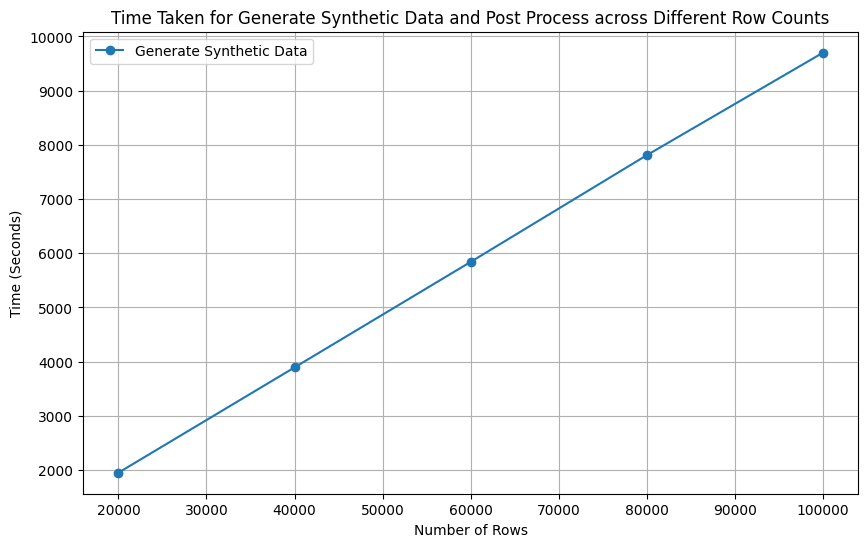

In [36]:
row_counts = [20000, 40000, 60000, 80000,100000]
generate_syn_data_times = []
post_process_times = []
preprocess_data_times = []

for key, value in runtime_collection.items():
    generate_syn_data_times.append(value['Time (seconds)'][7])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(row_counts, generate_syn_data_times, label='Generate Synthetic Data', marker='o')
# plt.plot(row_counts, post_process_times, label='Post Process', marker='x')
#plt.plot(row_counts, preprocess_data_times, label='Pre Process', marker='v')
plt.xlabel('Number of Rows')
plt.ylabel('Time (Seconds)')
plt.title('Time Taken for Generate Synthetic Data and Post Process across Different Row Counts')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
data_size_vary['20000rows data'].to_csv("20000_rows_crab_syn_gmcm.csv", index = False)

data_size_vary['40000rows data'].to_csv("40000_rows_crab_syn_gmcm.csv", index = False)

data_size_vary['60000rows data'].to_csv("60000_rows_crab_syn_gmcm.csv", index = False)

data_size_vary['80000rows data'].to_csv("80000_rows_crab_syn_gmcm.csv", index = False)

data_size_vary['100000rows data'].to_csv("100000_rows_crab_syn_gmcm.csv", index = False)


In [40]:
data_size_vary['20000rows data']

,Length,Height,Diameter,Weight,Shell Weight,Sex,Shucked Weight,Viscera Weight,Age,id
0,1.168226,0.298537,0.902364,13.763737,4.961000,I,4.933881,2.924076,9.001348,49575
1,1.612082,0.427595,1.156595,35.045142,10.006528,F,14.481390,7.890058,11.001691,27062
2,1.324608,0.364355,1.176651,22.309214,6.400668,F,10.414090,5.066677,9.000037,33547
3,1.488520,0.386456,1.123976,29.317888,8.107229,I,13.277515,6.191311,12.003041,40595
4,1.701801,0.475556,1.381219,45.234542,13.081071,F,18.156180,10.212864,10.000149,55467
...,...,...,...,...,...,...,...,...,...,...
19995,1.387816,0.376482,1.076352,21.558320,6.284689,M,8.929999,3.586703,9.998723,8648
19996,1.393659,0.344022,1.091299,21.487503,4.500909,M,11.547549,5.909100,11.000230,6332
19997,1.183768,0.312322,0.906894,17.228870,5.734375,F,10.163867,4.376880,6.000654,6382
19998,1.262412,0.311398,0.852032,13.916078,3.782110,F,7.264217,4.121462,9.001091,71350


## GCKM Learning Curve

In [2]:
data_size_vary = {}
runtime_collection = {}
data = pd.read_csv("crab_age.csv")
for i in range(9):
    import GCKM as G
    G = G.GaussianCopulaKmeansSynthesizer(data)
    G._identify_columns()
    G.convert_datetime_to_numerical()
    G.handle_missing_values()
    G.assign_intervals()
    G.preprocess_data()
    G.get_distribution()
    G.calculate_cdfs()
    G.standard_gaussian_all()
    G.optimal_clusters_dynamic()
    G.get_Kmeans()
    G.generate_data()
    G.generate_synthetic_data((i+1)*10000)
    G.post_process()
    synthetic = G.synthetic_data
    synthetic["Age"] = np.round(synthetic["Age"]).astype(int)
    data_size_vary[str((i+1)*10000) + "rows data"] = synthetic
    runtime_collection[str((i+1)*10000) + "rows data runtime"] = G.get_execution_times_df()

100%|██████████| 2/2 [00:56<00:00, 28.10s/it]
  File "c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
100%|██████████| 90000/90000 [01:47<00:00, 838.22it/s]


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Function to calculate regression metrics
def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Avoid division by zero for MAPE
    non_zero_mask = y_true != 0
    mape = (np.abs(y_true - y_pred) / y_true)[non_zero_mask].mean() * 100

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    }

# Loading real data
real_data = pd.read_csv("crab_age.csv")
real_data.drop(["id"], axis=1, inplace=True)

# Extract target column and input columns from real data
target_column = 'Age'
input_columns = real_data.drop(columns=[target_column]).columns.tolist()

input_columns = list(real_data.select_dtypes(include=np.number).columns.tolist()) + list(real_data.select_dtypes(exclude=np.number).columns.tolist())
input_columns = set(input_columns) - set(["Sex"])
input_columns = list(input_columns)

# Function for learning curve evaluation
def learning_curve_evaluation(data_sizes, real_data, target_column, input_columns):
    performance_metrics = []

    for size, synthetic_data in data_sizes.items():
        # Preprocessing
        X_synthetic = synthetic_data[input_columns]
        y_synthetic = synthetic_data[target_column]
        X_real = real_data[input_columns]
        y_real = real_data[target_column]
        scaler = MinMaxScaler()
        X_synthetic[X_synthetic.select_dtypes(include=np.number).columns.tolist()] = scaler.fit_transform(X_synthetic[X_synthetic.select_dtypes(include=np.number).columns.tolist()])
        X_real[X_real.select_dtypes(include=np.number).columns.tolist()] = scaler.fit_transform(X_real[X_real.select_dtypes(include=np.number).columns.tolist()])

        encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

        encoder.fit(X_synthetic[X_synthetic.select_dtypes(exclude=np.number).columns.tolist()])
        encoded_cols = encoder.get_feature_names_out()
        encoded_cols

        X_synthetic[encoded_cols] = encoder.transform(X_synthetic[X_synthetic.select_dtypes(exclude=np.number).columns.tolist()])
        X_real[encoded_cols] = encoder.transform(X_real[X_real.select_dtypes(exclude=np.number).columns.tolist()])

        # Train-test split for synthetic data
        X_train, X_val, y_train, y_val = train_test_split(X_synthetic, y_synthetic, test_size=0.1, random_state=42)

        # Model training and hyperparameter tuning
        rf = RandomForestRegressor(random_state=0)
        param_grid = {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [1, 3, 5, 7],
            'criterion': ['squared_error', 'poisson']
        }
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Best model
        best_rf = grid_search.best_estimator_

        # Predictions and metrics
        y_pred = best_rf.predict(X_real)
        metrics = calculate_regression_metrics(y_real, y_pred)
        performance_metrics.append({'Data Size': size, **metrics})

    return pd.DataFrame(performance_metrics)

# Running the evaluation
learning_curve_results = learning_curve_evaluation(data_size_vary, real_data, target_column, input_columns)
learning_curve_results

,Data Size,MAE,MSE,RMSE,R-squared,MAPE
0,10000rows data,2.573411,7.552080,2.748105,0.250911,25.441023
1,20000rows data,2.008978,4.528314,2.127984,0.550838,20.086076
2,30000rows data,1.238756,1.798393,1.341042,0.821618,12.399640
3,40000rows data,2.008814,4.526451,2.127546,0.551023,20.085466
4,50000rows data,2.355592,6.282247,2.506441,0.376866,23.414009
5,60000rows data,2.008846,4.527093,2.127697,0.550959,20.085562
6,70000rows data,2.008832,4.526921,2.127656,0.550976,20.085507
7,80000rows data,2.008913,4.527960,2.127900,0.550873,20.085800
8,90000rows data,1.597081,3.009141,1.734688,0.701524,15.782167


### GCKM Learning Curve Result

In [5]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["MAE"], mode='lines+markers', name='MAE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["MSE"], mode='lines+markers', name='MSE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["RMSE"], mode='lines+markers', name='RMSE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["R-squared"], mode='lines+markers', name='R-squared'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["MAPE"], mode='lines+markers', name='MAPE'))


# Update plot layout
fig.update_layout(title='Performance Metrics across Different Data Sizes',
                  xaxis_title='Data Size',
                  yaxis_title='Metric Value',
                  legend_title='Metrics')

# Show plot
fig.show()

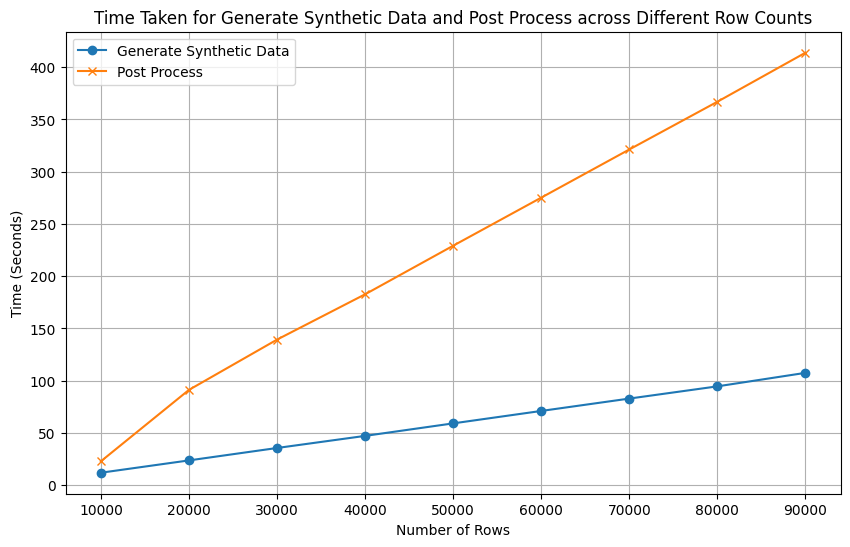

In [7]:
import matplotlib.pyplot as plt

row_counts = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]
generate_syn_data_times = []
post_process_times = []
preprocess_data_times = []

for key, value in runtime_collection.items():
    generate_syn_data_times.append(value['Time (seconds)'][3])
    post_process_times.append(value['Time (seconds)'][4]) 
    preprocess_data_times.append(value['Time (seconds)'][2]) 

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(row_counts, generate_syn_data_times, label='Generate Synthetic Data', marker='o')
plt.plot(row_counts, post_process_times, label='Post Process', marker='x')
#plt.plot(row_counts, preprocess_data_times, label='Pre Process', marker='v')
plt.xlabel('Number of Rows')
plt.ylabel('Time (Seconds)')
plt.title('Time Taken for Generate Synthetic Data and Post Process across Different Row Counts')
plt.legend()
plt.grid(True)
plt.show()

## SDV Learning Curve

In [4]:
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality
from sdv.single_table import GaussianCopulaSynthesizer
import time

data_size_vary_sdv = {}
timings = []
for i in range(9):
  start_time = time.time()
  metadata1 = SingleTableMetadata()
  data_crab = pd.read_csv("crab_age.csv")
  metadata1.detect_from_dataframe(data = data_crab)
  synthesier = GaussianCopulaSynthesizer(metadata1)
  synthesier.fit(data_crab)
  synthetic_data = synthesier.sample(num_rows = (i+1)*10000)  #keep the number of rows equal to the data hold
  end_time = time.time()
  timings.append(((i+1)*10000, end_time - start_time))
  print(timings)
  data_size_vary_sdv[str((i+1)*10000) + "rows data"] = synthetic_data

timing_df = pd.DataFrame(timings, columns = ["Rows", "Time (seconds)"])
timing_df



[(10000, 34.39296317100525)]
[(10000, 34.39296317100525), (20000, 36.46764159202576)]
[(10000, 34.39296317100525), (20000, 36.46764159202576), (30000, 35.78294777870178)]
[(10000, 34.39296317100525), (20000, 36.46764159202576), (30000, 35.78294777870178), (40000, 34.463911294937134)]
[(10000, 34.39296317100525), (20000, 36.46764159202576), (30000, 35.78294777870178), (40000, 34.463911294937134), (50000, 34.97150540351868)]
[(10000, 34.39296317100525), (20000, 36.46764159202576), (30000, 35.78294777870178), (40000, 34.463911294937134), (50000, 34.97150540351868), (60000, 35.39900612831116)]
[(10000, 34.39296317100525), (20000, 36.46764159202576), (30000, 35.78294777870178), (40000, 34.463911294937134), (50000, 34.97150540351868), (60000, 35.39900612831116), (70000, 36.538995027542114)]
[(10000, 34.39296317100525), (20000, 36.46764159202576), (30000, 35.78294777870178), (40000, 34.463911294937134), (50000, 34.97150540351868), (60000, 35.39900612831116), (70000, 36.538995027542114), (8000

,Rows,Time (seconds)
0,10000,34.392963
1,20000,36.467642
2,30000,35.782948
3,40000,34.463911
4,50000,34.971505
5,60000,35.399006
6,70000,36.538995
7,80000,36.489170
8,90000,37.519187


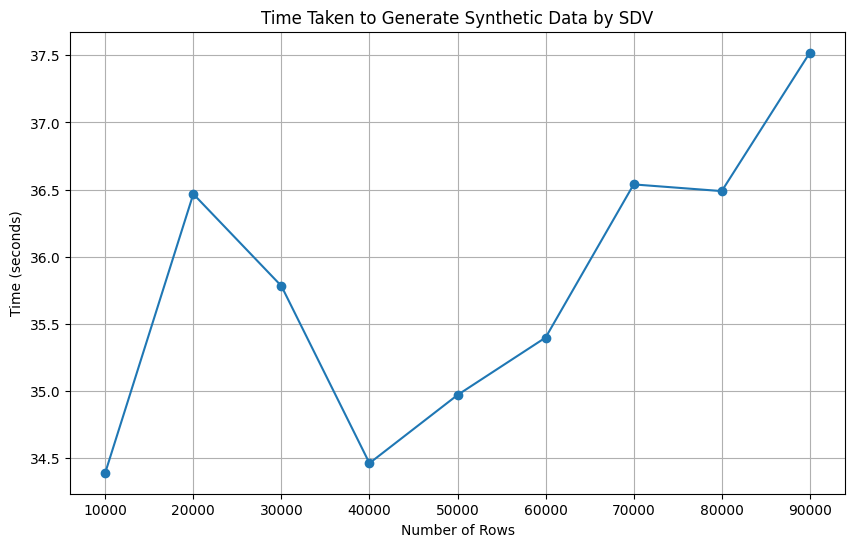

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(timing_df['Rows'], timing_df['Time (seconds)'], marker='o', linestyle='-')
plt.title('Time Taken to Generate Synthetic Data by SDV')
plt.xlabel('Number of Rows')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Function to calculate regression metrics
def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Avoid division by zero for MAPE
    non_zero_mask = y_true != 0
    mape = (np.abs(y_true - y_pred) / y_true)[non_zero_mask].mean() * 100

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    }

# Loading real data
real_data = pd.read_csv("crab_age.csv")
real_data.drop(["id"], axis=1, inplace=True)

# Extract target column and input columns from real data
target_column = 'Age'
input_columns = real_data.drop(columns=[target_column]).columns.tolist()

input_columns = list(real_data.select_dtypes(include=np.number).columns.tolist()) + list(real_data.select_dtypes(exclude=np.number).columns.tolist())
input_columns = set(input_columns) - set(["Sex"])
input_columns = list(input_columns)

# Function for learning curve evaluation
def learning_curve_evaluation(data_sizes, real_data, target_column, input_columns):
    performance_metrics = []

    for size, synthetic_data in data_sizes.items():
        # Preprocessing
        X_synthetic = synthetic_data[input_columns]
        y_synthetic = synthetic_data[target_column]
        X_real = real_data[input_columns]
        y_real = real_data[target_column]
        scaler = MinMaxScaler()
        X_synthetic[X_synthetic.select_dtypes(include=np.number).columns.tolist()] = scaler.fit_transform(X_synthetic[X_synthetic.select_dtypes(include=np.number).columns.tolist()])
        X_real[X_real.select_dtypes(include=np.number).columns.tolist()] = scaler.fit_transform(X_real[X_real.select_dtypes(include=np.number).columns.tolist()])

        encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

        encoder.fit(X_synthetic[X_synthetic.select_dtypes(exclude=np.number).columns.tolist()])
        encoded_cols = encoder.get_feature_names_out()
        encoded_cols

        X_synthetic[encoded_cols] = encoder.transform(X_synthetic[X_synthetic.select_dtypes(exclude=np.number).columns.tolist()])
        X_real[encoded_cols] = encoder.transform(X_real[X_real.select_dtypes(exclude=np.number).columns.tolist()])

        # Train-test split for synthetic data
        X_train, X_val, y_train, y_val = train_test_split(X_synthetic, y_synthetic, test_size=0.1, random_state=42)

        # Model training and hyperparameter tuning
        rf = RandomForestRegressor(random_state=0)
        param_grid = {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [1, 3, 5, 7],
            'criterion': ['squared_error', 'poisson']
        }
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Best model
        best_rf = grid_search.best_estimator_

        # Predictions and metrics
        y_pred = best_rf.predict(X_real)
        metrics = calculate_regression_metrics(y_real, y_pred)
        performance_metrics.append({'Data Size': size, **metrics})

    return pd.DataFrame(performance_metrics)

# Running the evaluation
learning_curve_results_sdv = learning_curve_evaluation(data_size_vary_sdv, real_data, target_column, input_columns)
learning_curve_results_sdv

,Data Size,MAE,MSE,RMSE,R-squared,MAPE
0,10000rows data,0.399299,0.492121,0.701513,0.951187,4.677500
1,20000rows data,0.399173,0.490872,0.700623,0.951311,4.677047
2,30000rows data,0.398969,0.489182,0.699416,0.951478,4.676310
3,40000rows data,0.603332,0.811288,0.900715,0.919529,4.958957
4,50000rows data,0.105234,0.109624,0.331096,0.989126,1.318256
5,60000rows data,0.105153,0.109311,0.330623,0.989157,1.317533
6,70000rows data,0.105310,0.110008,0.331675,0.989088,1.315842
7,80000rows data,0.105247,0.109545,0.330976,0.989134,1.317703
8,90000rows data,0.105190,0.109534,0.330960,0.989135,1.315395


### SDV Learning Curve Result

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=learning_curve_results_sdv["Data Size"], y=learning_curve_results_sdv["MAE"], mode='lines+markers', name='MAE'))
fig.add_trace(go.Scatter(x=learning_curve_results_sdv["Data Size"], y=learning_curve_results_sdv["MSE"], mode='lines+markers', name='MSE'))
fig.add_trace(go.Scatter(x=learning_curve_results_sdv["Data Size"], y=learning_curve_results_sdv["RMSE"], mode='lines+markers', name='RMSE'))
fig.add_trace(go.Scatter(x=learning_curve_results_sdv["Data Size"], y=learning_curve_results_sdv["R-squared"], mode='lines+markers', name='R-squared'))
fig.add_trace(go.Scatter(x=learning_curve_results_sdv["Data Size"], y=learning_curve_results_sdv["MAPE"], mode='lines+markers', name='MAPE'))


# Update plot layout
fig.update_layout(title='Performance Metrics across Different Data Sizes',
                  xaxis_title='Data Size',
                  yaxis_title='Metric Value',
                  legend_title='Metrics')

# Show plot
fig.show()

## Y-data Learning Curve

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

crab_age_syn_ydata_10000 = pd.read_csv("crab_age_10000_ydata.csv")
crab_age_syn_ydata_20000 = pd.read_csv("crab_age_20000_ydata.csv")
crab_age_syn_ydata_30000 = pd.read_csv("crab_age_30000_ydata.csv")
crab_age_syn_ydata_40000 = pd.read_csv("crab_age_40000_ydata.csv")
crab_age_syn_ydata_50000 = pd.read_csv("crab_age_50000_ydata.csv")
crab_age_syn_ydata_60000 = pd.read_csv("crab_age_60000_ydata.csv")
crab_age_syn_ydata_70000 = pd.read_csv("crab_age_70000_ydata.csv")
crab_age_syn_ydata_80000 = pd.read_csv("crab_age_80000_ydata.csv")
crab_age_syn_ydata_90000 = pd.read_csv("crab_age_90000_ydata.csv")

In [12]:
appen_list = [crab_age_syn_ydata_10000, crab_age_syn_ydata_20000, crab_age_syn_ydata_30000, crab_age_syn_ydata_40000, crab_age_syn_ydata_50000, crab_age_syn_ydata_60000, crab_age_syn_ydata_70000, crab_age_syn_ydata_80000, crab_age_syn_ydata_90000]
data_size_vary_y_data = {}
for i in range(9):
    data_size_vary_y_data[str((i+1)*10000) + "rows data"] = appen_list[i]

In [13]:
# Function to calculate regression metrics
def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Avoid division by zero for MAPE
    non_zero_mask = y_true != 0
    mape = (np.abs(y_true - y_pred) / y_true)[non_zero_mask].mean() * 100

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    }

# Loading real data
real_data = pd.read_csv("crab_age.csv")
real_data.drop(["id"], axis=1, inplace=True)

# Extract target column and input columns from real data
target_column = 'Age'
input_columns = real_data.drop(columns=[target_column]).columns.tolist()

input_columns = list(real_data.select_dtypes(include=np.number).columns.tolist()) + list(real_data.select_dtypes(exclude=np.number).columns.tolist())
input_columns = set(input_columns) - set(["Sex"])
input_columns = list(input_columns)

# Function for learning curve evaluation
def learning_curve_evaluation(data_sizes, real_data, target_column, input_columns):
    performance_metrics = []

    for size, synthetic_data in data_sizes.items():
        # Preprocessing
        X_synthetic = synthetic_data[input_columns]
        y_synthetic = synthetic_data[target_column]
        X_real = real_data[input_columns]
        y_real = real_data[target_column]
        scaler = MinMaxScaler()
        X_synthetic[X_synthetic.select_dtypes(include=np.number).columns.tolist()] = scaler.fit_transform(X_synthetic[X_synthetic.select_dtypes(include=np.number).columns.tolist()])
        X_real[X_real.select_dtypes(include=np.number).columns.tolist()] = scaler.fit_transform(X_real[X_real.select_dtypes(include=np.number).columns.tolist()])

        encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

        encoder.fit(X_synthetic[X_synthetic.select_dtypes(exclude=np.number).columns.tolist()])
        encoded_cols = encoder.get_feature_names_out()
        encoded_cols

        X_synthetic[encoded_cols] = encoder.transform(X_synthetic[X_synthetic.select_dtypes(exclude=np.number).columns.tolist()])
        X_real[encoded_cols] = encoder.transform(X_real[X_real.select_dtypes(exclude=np.number).columns.tolist()])

        # Train-test split for synthetic data
        X_train, X_val, y_train, y_val = train_test_split(X_synthetic, y_synthetic, test_size=0.1, random_state=42)

        # Model training and hyperparameter tuning
        rf = RandomForestRegressor(random_state=42)
        param_grid = {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [1, 3, 5, 7],
            'criterion': ['squared_error', 'poisson']
        }
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Best model
        best_rf = grid_search.best_estimator_

        # Predictions and metrics
        y_pred = best_rf.predict(X_real)
        metrics = calculate_regression_metrics(y_real, y_pred)
        performance_metrics.append({'Data Size': size, **metrics})

    return pd.DataFrame(performance_metrics)

# Running the evaluation
learning_curve_results = learning_curve_evaluation(data_size_vary_y_data, real_data, target_column, input_columns)
learning_curve_results

,Data Size,MAE,MSE,RMSE,R-squared,MAPE
0,10000rows data,0.914754,0.914550,0.956321,0.909286,10.592595
1,20000rows data,0.914499,0.914358,0.956221,0.909305,10.578597
2,30000rows data,0.913964,0.913921,0.955992,0.909348,10.578015
3,40000rows data,0.913628,0.913536,0.955791,0.909387,10.573392
4,50000rows data,0.913923,0.913704,0.955879,0.909370,10.574717
5,60000rows data,0.913705,0.913566,0.955806,0.909384,10.573647
6,70000rows data,0.913614,0.913546,0.955796,0.909386,10.573906
7,80000rows data,0.913553,0.913525,0.955785,0.909388,10.573037
8,90000rows data,0.913570,0.913525,0.955785,0.909388,10.572896


### Y-data Learning Curve

In [14]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["MAE"], mode='lines+markers', name='MAE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["MSE"], mode='lines+markers', name='MSE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["RMSE"], mode='lines+markers', name='MSE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["R-squared"], mode='lines+markers', name='MSE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["MAPE"], mode='lines+markers', name='MSE'))


# Update plot layout
fig.update_layout(title='Performance Metrics across Different Data Sizes',
                  xaxis_title='Data Size',
                  yaxis_title='Metric Value',
                  legend_title='Metrics')

fig.update_xaxes(tickangle=45)
# Show plot
fig.show()